Before we begin, we will change a few settings to make the notebook look a bit prettier:

In [1]:
%%html
<style> body {font-family: "Calibri", cursive, sans-serif;} </style>

<img src="../multimedia/gauntlet.PNG" width="75" align="right">

# Thanos or Grimace?<br>Classifying Purple Fiction Characters
---
In this notebook, we will create two CNN frameworks to classify images
of Thanos or Grimace. For more info, take a look at the [README file](../README.md). 

Alright, let's get started.


# Preliminaries
First, let's import all the relevant packages, configure some plotting options, and define some basic (path) variables.

In [2]:
%matplotlib inline

import sys
import os
import random
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import pickle

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import ResNet50

In [3]:
# Import user-defined scripts.
PATH_SCRIPTS = os.path.join('..', 'scripts')
if PATH_SCRIPTS not in sys.path:
    sys.path.append(PATH_SCRIPTS)
import purplefunctions

In [4]:
# Plotting options.
mpl.rcParams['font.sans-serif'] = 'Calibri'
mpl.rcParams['font.family'] = 'sans-serif'
sns.set(font_scale=1.75)
sns.set(font = 'Calibri')
sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False)

Setup paths.

In [5]:
PATH_DATA = pathlib.Path(r'../data')

PATH_MODELS = pathlib.Path(r'../models')
if not PATH_MODELS.exists():
    PATH_MODELS.mkdir()
    print("Created directory " + str(PATH_MODELS))
    
PATH_RESULTS = pathlib.Path(r'../results')
if not PATH_RESULTS.exists():
    PATH_RESULTS.mkdir()
    print("Created directory " + str(PATH_RESULTS))

# Data
## Data Fetching
I couldn't find a dataset of Thanos and Grimace images large enough for this
project. Thus, I created it myself leveraging the search function of 
Google Images.

Originally, I wanted to use a semi-automatic approach, 
similar to what [is suggested in this tutorial](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/).
However, I could never get it running. My guess is that it is a bit old and
no longer compatible with the most recent versions of web browsers.
Therefore, I looked for other alternatives and found [Fatkun Batch Download Image extension for Chrome](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf).
This is a very handy tool which allows you to manually select and download
all the images of a single tab in your browser to your computer. Although
at the beginning I was a bit bummed that I had to click through a lot of 
images, I quickly realized this was a necessary step if I wanted to have
a decently curated dataset.

I selected and downloaded images that:
* Had the character in any representation (e.g., photo, comic, drawing, cartoon, etc.)
* Showed the character from different angles

You can find the dataset in [this repository](../data/images) for ease of
use as well as in [Kaggle](https://www.kaggle.com/arturomoncadatorres/thanos-or-grimace).

## Data Structuring
Afterwards, we will structure the images of interest (as required by Keras).
We need to "manually" (i.e., write the code to) split our data into 
training and validation directories.

```
|-- training
   |-- thanos
   |-- grimace
|-- validation
   |-- thanos
   |-- grimace
```

Recently, a [new functionality was implemented](https://kylewbanks.com/blog/train-validation-split-with-imagedatagenerator-keras)
that allows you to randomly split your data just by specifying what 
percentage should be used for the validation. Although this saves us
from structuring the data, it doesn't allow for data augmentation.
Therefore, we will be sticking with the more "classical" approach.

In [6]:
val_prop = 0.25
purplefunctions.structure_images(PATH_DATA, val_prop=val_prop)

Deleted directory (and its contents) ..\data\training\grimace
Created directory ..\data\training\grimace
Deleted directory (and its contents) ..\data\training\thanos
Created directory ..\data\training\thanos
Deleted directory (and its contents) ..\data\validation\grimace
Created directory ..\data\validation\grimace
Deleted directory (and its contents) ..\data\validation\thanos
Created directory ..\data\validation\thanos
Copied ..\data\images\grimace\grimace_(199).jpg to ..\data\training\grimace\000.png
Copied ..\data\images\grimace\grimace_(9).jpg to ..\data\training\grimace\001.png
Copied ..\data\images\grimace\grimace_(44).jpg to ..\data\training\grimace\002.png
Copied ..\data\images\grimace\grimace_(93).jpg to ..\data\training\grimace\003.png
Copied ..\data\images\grimace\grimace_(197).jpg to ..\data\training\grimace\004.png
Copied ..\data\images\grimace\grimace_(3).jpg to ..\data\training\grimace\005.png
Copied ..\data\images\grimace\grimace_(173).jpg to ..\data\training\grimace\00

Copied ..\data\images\grimace\grimace_(76).jpg to ..\data\training\grimace\095.png
Copied ..\data\images\grimace\grimace_(194).jpg to ..\data\training\grimace\096.png
Copied ..\data\images\grimace\grimace_(51).jpg to ..\data\training\grimace\097.png
Copied ..\data\images\grimace\grimace_(46).jpg to ..\data\training\grimace\098.png
Copied ..\data\images\grimace\grimace_(175).jpg to ..\data\training\grimace\099.png
Copied ..\data\images\grimace\grimace_(87).jpg to ..\data\training\grimace\100.png
Copied ..\data\images\grimace\grimace_(132).jpg to ..\data\training\grimace\101.png
Copied ..\data\images\grimace\grimace_(152).jpg to ..\data\training\grimace\102.png
Copied ..\data\images\grimace\grimace_(94).jpg to ..\data\training\grimace\103.png
Copied ..\data\images\grimace\grimace_(110).jpg to ..\data\training\grimace\104.png
Copied ..\data\images\grimace\grimace_(177).jpg to ..\data\training\grimace\105.png
Copied ..\data\images\grimace\grimace_(141).jpg to ..\data\training\grimace\106.p

Copied ..\data\images\thanos\thanos_(81).jpg to ..\data\training\thanos\049.png
Copied ..\data\images\thanos\thanos_(248).jpg to ..\data\training\thanos\050.png
Copied ..\data\images\thanos\thanos_(65).jpg to ..\data\training\thanos\051.png
Copied ..\data\images\thanos\thanos_(250).jpg to ..\data\training\thanos\052.png
Copied ..\data\images\thanos\thanos_(165).jpg to ..\data\training\thanos\053.png
Copied ..\data\images\thanos\thanos_(109).jpg to ..\data\training\thanos\054.png
Copied ..\data\images\thanos\thanos_(108).jpg to ..\data\training\thanos\055.png
Copied ..\data\images\thanos\thanos_(231).jpg to ..\data\training\thanos\056.png
Copied ..\data\images\thanos\thanos_(127).jpg to ..\data\training\thanos\057.png
Copied ..\data\images\thanos\thanos_(113).jpg to ..\data\training\thanos\058.png
Copied ..\data\images\thanos\thanos_(69).jpg to ..\data\training\thanos\059.png
Copied ..\data\images\thanos\thanos_(233).jpg to ..\data\training\thanos\060.png
Copied ..\data\images\thanos\th

Copied ..\data\images\thanos\thanos_(170).jpg to ..\data\validation\thanos\046.png
Copied ..\data\images\thanos\thanos_(105).jpg to ..\data\validation\thanos\047.png
Copied ..\data\images\thanos\thanos_(24).jpg to ..\data\validation\thanos\048.png
Copied ..\data\images\thanos\thanos_(180).jpg to ..\data\validation\thanos\049.png
Copied ..\data\images\thanos\thanos_(212).jpg to ..\data\validation\thanos\050.png


# Creating CNNs
We will use TensorFlow 2.0 to generate two CNNs for our task.
I like using Keras as a front-end for TensorFlow. However, with this new
release it is recommended to drop Keras and move towards [`tf.keras`](https://www.tensorflow.org/guide/keras).
Therefore, we will be doing that here. It is worth mentioning
that for our purposes, [they are quite similar](https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/).

## CNN from scratch
First, we will generate a CNN from scratch. In other words, we will
manually define its architecture. More than a science, this can be an art.
Kidding aside, optimizing an architecture even for a dataset as relatively
simple as [MNIST can take thousands of simulations](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist) 
(with their accompanying processing time). Furthermore, this isn't our
purpose, at least not for today. Therefore, we will just create a simple, 
"vanilla" CNN to see how it performs in our task.

To begin, we need to initialize our CNN. Since it will consist of a linear
stack of layers, we will use `tf.keras`'s [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Then, we will define the next layers. Each layer of a CNN is composed of 
of a _convolutional layer_ and a _pooling layer_ :
* The convolutional layer extracts the images' features (e.g., 
contours, gradient orientation, pixel clusters, colors, etc.). Lower layers
capture lower (i.e., more generic) features. On the other hand, higher layers 
are trained to capture features that are more specific for the images at hand.
All features are learned by the different filters at each layer. These
filters are initialized randomly, which makes them learn slightly different.
Training will allow each filter to learn to detect specific features of the image.
* The pooling layer reduces the (spatial) size of the convolutional layer.
Put in another way, it performs dimensionality reduction.
This is very handy to reduce the computational power required by the CNN.
There are two types of pooling:
  * Average pooling returns the mean value of the image portion covered by 
the kernel. 
  * Max pooling returns the maximum value. This also brings the benefit of 
ignoring noisy activations, implicitely performing a denoising operation. 
Thus, overall max pooling is the method of choice (and the one we will be 
using here).

Notice how `tf.keras` allows us to chain the layers very easily.

In [7]:
# Initialization.
model_scratch = Sequential()

# Layer 1
# This is the only layer where we need to define an input shape.
# Notice how the batch dimension is not included.
model_scratch.add(layers.Conv2D(filters=32, kernel_size=(5, 5), input_shape=(224, 224, 3), activation='relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model_scratch.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model_scratch.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

Pay attention to how as the spatial dimensions are decreasing, the number of
filters learned is increasing. This is a common practice in CNN architecture.
Regarding `kernel_size`, as a rule of thumb, dealing with images larger than $128 \times 128$
allows us to have a kernel of $5 \times 5$ (and maybe even $7 \times 7$).
After the first layer, we go to a more conventional kernel size of $3 \times 3$.

For a more in-depth explanation of CNNs' architecture and [`tf.keras`'s
parameters](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D),
I strongly recommend [Adrian Rosebrock's tutorial](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)
as well as [this article by Dishashree Gupta](https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/).
Both are very thorough and quite interactive, which really helps understanding

### Generate classification head
We can think of the convolutional layers as a feature extractor. Now, 
we need to add a classifier on top of it and train it. This part is know
as the _classification head_. We will use a fully connected layer for this.
Does it _need_ to be a fully connected layer? Not really. However, using 
something else (e.g., SVM) is [probably not worth it](https://stats.stackexchange.com/questions/168064/why-do-convolutional-neural-networks-not-use-a-support-vector-machine-to-classif).

First, we need to [flatten the input](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) 
to the fully connected layer. In other words, we will go from a high 
dimensional representation to a 1D vector of neurons.

Then, we will add a few dense layers. Since we are interested
in a binary classification task, the last layer will consist of a single
neuron with a sigmoid activation function, yielding probabilities as an 
output. We will be going for something simple. Furthere improvements could
include more layers with a different number of units and including
layers with [dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

In [8]:
# Flattening
model_scratch.add(layers.Flatten())

# Fully connected layer.
model_scratch.add(layers.Dense(units=64, activation='relu'))
model_scratch.add(layers.Dense(units=32, activation='relu'))
model_scratch.add(layers.Dense(units=1, activation='sigmoid'))

Let's take a look at the big picture of our model.

In [9]:
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

Our network has >5 M parameters (all of them trainable). 
That's a lot of parameters!

## CNN using transfer learning
Next, we will create our network using transfer learning. We will use the [ResNet-50 model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)
as a base. Namely, we will use its already trained convolutional layers and 
adapt (i.e., train) the classification head.

### Load pre-trained network
We will load the ResNet50 model. The first time, this might take a few (~5) minutes.
Afterwards, we will [freeze its convolutional layers](https://github.com/keras-team/keras/issues/4465#issuecomment-311000870)
to make sure we won't change them at all.

In [10]:
cnn_resnet50 = ResNet50(include_top=False, # Whether to include the fully-connected layer at the top (or not)
                          weights='imagenet') # Weights were obtained trained on ImageNet.

for conv_layer in cnn_resnet50.layers:
    conv_layer.trainable = False

cnn_resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

We can see that this model has > 23 M parameters. Notice how _none_ of 
them are trainable. It is worth mentioning this model is different
from our CNN from scratch not only in the number of parameters, but
also in its architecture. You can read more about it in the [original paper](http://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf)

### Generate classification head
For the sake of comparision, we will use the same classification head as 
in the previous case. The code is slightly different, since we need to 
fetch the output layer of the pretrained CNN. Then we can start adding 
layers. We will use `tf.keras`'s [`GlobalAveragePooling2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) 
to average over the spatial locations and convert the features to a
1D vector (per image).

In [11]:
x = cnn_resnet50.output
x = layers.GlobalAveragePooling2D()(x) # Global average layer
x = layers.Dense(64, activation='relu')(x) # Dense layer
x = layers.Dense(32, activation='relu')(x) # Dense layer
x = layers.Dense(1, activation='sigmoid')(x) # Prediction (output) layer
model_tl = Model(cnn_resnet50.input, x)

model_tl.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block1_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, None, None, 2 0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, None, None, 2 0           conv4_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_bloc

Now we have 133,249 additional parameters that _are_ trainable. These 
correspond to the classification head we just added.

It is always a good sanity check to verify where do these parameters 
come from. In our case:

* $2048 \times 64$ weights from the global to the dense layer
* $64 \times 32$ weights from dense to dense layer
* $32 \times 1$ weights from dense to prediction layer
* $64$, $32$, and $1$ biases from the dense and the prediction layers

In [12]:
n_params_tl = (2048*64) + (64*32) + (32*1) + (64+32+1)
print("TL trainable parameters = {0:d}".format(n_params_tl))

TL trainable parameters = 133249


Looks like we are good!

## Compiling our models.
Finally, we will define our models' optimizer, loss function, and metric
and compile the whole thing. We will use the same parameters for both models
(the one we built from scratch and the one we built using transfer learning)
for a fair comparison.

In [13]:
optimizer = tf.keras.optimizers.Adam() # Adam = RMSprop + Momentum (https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
loss = 'binary_crossentropy' # Since it is a binary classification (Thanos or Grimace)
metrics = ['accuracy']

model_scratch.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model_tl.compile(loss=loss, optimizer=optimizer, metrics=metrics)

## Model fitting
Fortunately, Keras makes fitting (i.e., training) a model very easy:

# Classification using CNNs

## Create data generators
We could manually load the images, pre-process them, and make them ready
for our task. However, `tf.keras` has an [ImageDataGenerator class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
that will save us lots of trouble. 

First, we will create an ImageDataGenerator instance where we will define
the augmentation operations that we want. It is important to mention that
with `tf.keras` we have no control over the order in which the data
augmentation operations will be executed. We will also define the function
that will be implied on each input (`preprocessing_function`). Notice that
this function is model specific. Since we will be using the ResNet-50 model,
we will use its corresponding function (as defined in the preliminaries).

Afterwards, we will apply the method [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory), 
which will will generate batches of augmented data based on the data located 
in the given path.

In [14]:
training_datagen = ImageDataGenerator(
        rotation_range=15, # Rotate images randomly withing this range (+/-).
        width_shift_range=0.1, # Translate images horizontally randomly within this proportion.
        height_shift_range=0.1, # Translate images vertically randomly within this proportion.
        shear_range=5, # Shear intensity (shear angle, [deg]).
        zoom_range=0.1, # Range for random zoom.
        vertical_flip=True,
        horizontal_flip=True,
        preprocessing_function=preprocess_input
        )

training_generator = training_datagen.flow_from_directory(
        directory=PATH_DATA/'training',
        batch_size=64, # Number of images per batch. Arbitrary.
        shuffle=True,
        class_mode='binary', # We have two possible outputs (Thanos or Grimace).
        target_size=(224, 224) # ResNet-50 requires these dimensions.
        )

Found 306 images belonging to 2 classes.


Now, we will create the generator for the validation set. It is pretty
much the same that for the training set, except we won't perform any
data augmentation.

In [15]:
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
        directory=PATH_DATA/'validation',
        batch_size=64,
        shuffle=False,
        class_mode='binary',
        target_size=(224, 224)
        )

Found 102 images belonging to 2 classes.


For practical reasons, we will generate the model only once. For future
runs of the script, we will load it from memory. Notice that we will need to
change this if we decide to implement something like 
cross validation, for instance.

In the future, I would like to look into [Git Large File Storage](https://git-lfs.github.com/)
for this type of things.

In [16]:
n_epochs = 50

model_scratch_name = 'model_scratch_epochs=' + str(n_epochs) + '_vprop={0:.2f}'.format(val_prop)
if not (PATH_MODELS/(model_scratch_name + '.h5')).exists():
    history_scratch_ = model_scratch.fit_generator(
            generator=training_generator,
            epochs=n_epochs,
            validation_data=validation_generator)
    model_scratch.save(PATH_MODELS/(model_scratch_name + '.h5'))

    # Save history.
    history_scratch = history_scratch_.history
    pickle.dump(history_scratch, open((PATH_MODELS/('history_' + model_scratch_name + '.p')), "wb" ))
    
else:
    # Load model.
    model_scratch = tf.keras.models.load_model((PATH_MODELS/(model_scratch_name + '.h5')))

    # Load history.
    history_scratch = pickle.load(open((PATH_MODELS/('history_' + model_scratch_name + '.p')), "rb" ))



model_tl_name = 'model_tl_epochs=' + str(n_epochs) + '_vprop={0:.2f}'.format(val_prop)
if not (PATH_MODELS/(model_tl_name + '.h5')).exists():        
    history_tl_ = model_tl.fit_generator(
            generator=training_generator,
            epochs=n_epochs,
            validation_data=validation_generator)
    model_tl.save(PATH_MODELS/(model_tl_name + '.h5'))

    # Save history.
    history_tl = history_tl_.history
    pickle.dump(history_tl, open((PATH_MODELS/('history_' + model_tl_name + '.p')), "wb" ))
    
else:
    # Load model.
    model_tl = tf.keras.models.load_model((PATH_MODELS/(model_tl_name + '.h5')))

    # Load history.
    history_tl = pickle.load(open((PATH_MODELS/('history_' + model_tl_name + '.p')), "rb" ))
   
    


Remember that training the model is very likely what will take the longest,
specially for a large number of epochs.

## Model evaluation
There are several ways to evaluate the performance of the model.

### Learning curves
Learning curves can show the evolution of the accuracy through the
epochs. Furthermore, they can also be a [valuable tool for diagnosing 
issues in our model.](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)
We can generate them very easily from the model history.

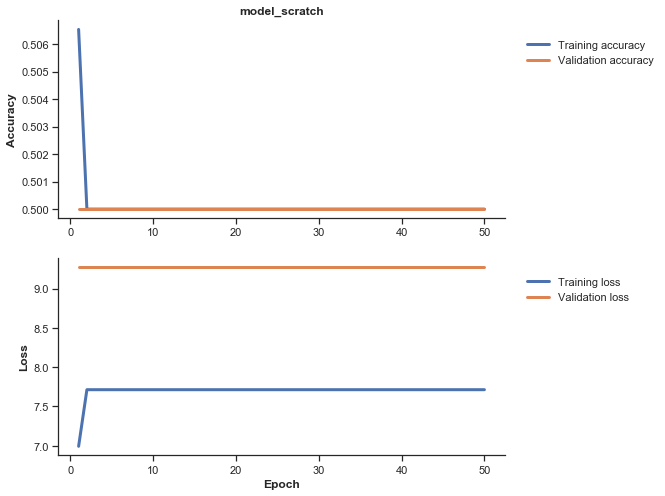

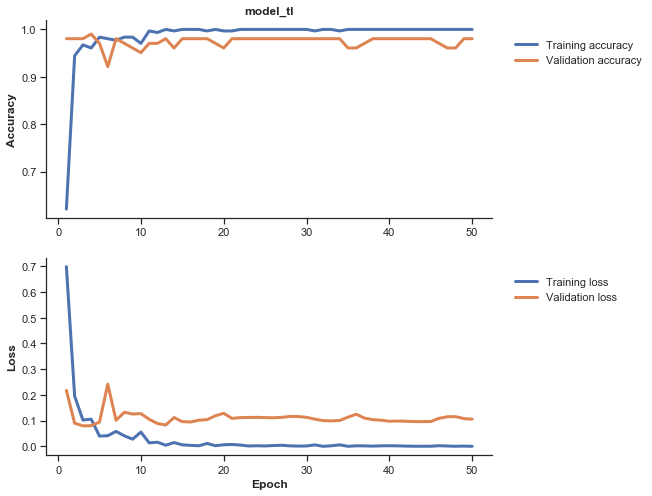

In [17]:
epochs = range(1, n_epochs+1)

for model_hist, model_name in zip([history_scratch, history_tl], ['model_scratch', 'model_tl']):

    fig, ax = plt.subplots(2, 1, figsize=[8, 8])
    
    # Accuracy
    ax[0].plot(epochs, model_hist['accuracy'], 
      linewidth=3, label="Training accuracy")
    ax[0].plot(epochs, model_hist['val_accuracy'], 
      linewidth=3, label="Validation accuracy")
    ax[0].legend(loc=(1.04, 0.75), frameon=False)
    #ax[0].set_ylim([0, 1])
    ax[0].set_ylabel("Accuracy", fontweight='bold')
    ax[0].set_title(model_name, fontweight='bold')
    
    # Loss
    ax[1].plot(epochs, model_hist['loss'], 
      linewidth=3, label="Training loss")
    ax[1].plot(epochs, model_hist['val_loss'], 
      linewidth=3, label="Validation loss")
    ax[1].legend(loc=(1.04, 0.75), frameon=False)
    #ax[1].set_ylim([0, 1])
    ax[1].set_xlabel("Epoch", fontweight='bold')
    ax[1].set_ylabel("Loss", fontweight='bold')
    
    fig.savefig(PATH_RESULTS/(model_name + '_epochs=' + str(n_epochs) + '_vprop={0:.2f}.h5'.format(val_prop) + '.pdf'), bbox_inches='tight', dpi=150)

We can clearly see that the TL model performs way better than the one
we developed from scratch (actually, the behaviour of the from-scratch model
is a bit weird - I will investigate that in the future). Thus, we will use 
the former for the rest of this notebook.

### Show predictions
We can actually feed any image to the model and see what probabilities it
yields (and therefore its predictions). In this case, we will take a look
at a random sample of the validation images. You can run the following cell
several times to take a new set of images.

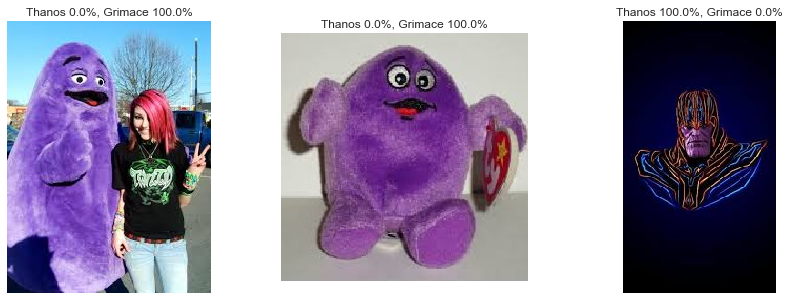

In [18]:
   
images_validation_path = list()
for item in (PATH_DATA/'validation').glob('**/*'):
    if not item.is_dir():
        images_validation_path.append(item)

n_images_validation = 3
images_validation_path = random.sample(images_validation_path, n_images_validation)
images_validation = [Image.open(image_validation_path) for image_validation_path in images_validation_path]

    
# Remember to preprocess the input!
image_batch = list()
image_batch = np.stack([preprocess_input(np.array(image_validation.resize((224, 224)))) for image_validation in images_validation])
prediction_probabilities = model_tl.predict(image_batch)

fig, axes = plt.subplots(1, n_images_validation, figsize=(15, 5))
for ii, image in enumerate(images_validation):
    axes[ii].imshow(image)
    axes[ii].set_title("Thanos {:.1f}%, Grimace {:.1f}%".format(100*prediction_probabilities[ii,0], 100*(1-prediction_probabilities[ii,0])))
    axes[ii].axis('off')

### Bonus: Grimos
Lastly, I want to try the model with images that I consider specially
tricky: Grimos. See the [README file](../README.md) for more about him. 

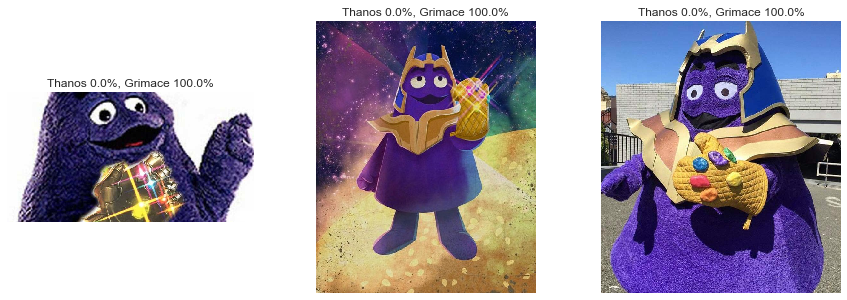

In [19]:
images_grimos_path = list()
for item in (PATH_DATA/'images'/'_grimos').glob('**/*'):
    if not item.is_dir():
        images_grimos_path.append(item)

n_images_grimos = 3
images_grimos_path = random.sample(images_grimos_path, n_images_validation)
images_grimos = [Image.open(image_grimos_path) for image_grimos_path in images_grimos_path]

    
# Remember to preprocess the input!
image_batch = list()
image_batch = np.stack([preprocess_input(np.array(image_grimos.resize((224, 224)))) for image_grimos in images_grimos])
prediction_probabilities = model_tl.predict(image_batch)

fig, axes = plt.subplots(1, n_images_grimos, figsize=(15, 5))
for ii, image in enumerate(images_grimos):
    axes[ii].imshow(image)
    axes[ii].set_title("Thanos {:.1f}%, Grimace {:.1f}%".format(100*prediction_probabilities[ii,0], 100*(1-prediction_probabilities[ii,0])))
    axes[ii].axis('off')

Surprisingly, the model predicts that Grimos is Grimace very confidently
(100% in all cases). I thought there would be at least a little bit of
doubt there.

# Future work
This is just a proof of concept of this model. It is far from being done and
it still has a few issues. For example, the model could have gotten lucky
on how the data were partitioned. Thus, we need to perform cross-validation.
It would be interesting in seeing which images perform the worse in
each pass. Also, I definitely think that the from-scratch model could 
perform better. I suspect there's something wrong with it. Furthermore, 
we could also implement drop out to avoid overfitting. Lastly, I would also 
like to use some explainability technique (e.g., LIME) to understand the 
models' performance. This could help understanding Grimos's results. 
It would also be interesting to look at the images that performed the worst.
I guess all these things will be for a follow-up of this project.